# Dependency Parsing

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/dependency](https://github.com/huseinzol05/Malaya/tree/master/example/dependency).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 5.52 s, sys: 1.24 s, total: 6.75 s
Wall time: 8.57 s


### Describe supported dependencies

In [2]:
malaya.dependency.describe()

INFO:root:you can read more from https://universaldependencies.org/treebanks/id_pud/index.html


,Tag,Description
0,acl,clausal modifier of noun
1,advcl,adverbial clause modifier
2,advmod,adverbial modifier
3,amod,adjectival modifier
4,appos,appositional modifier
5,aux,auxiliary
6,case,case marking
7,ccomp,clausal complement
8,advmod,adverbial modifier
9,compound,compound


In [3]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

### List available transformer Dependency models

In [4]:
malaya.dependency.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),Arc Accuracy,Types Accuracy,Root Accuracy
bert,426.0,112.0,0.855,0.848,0.920
tiny-bert,59.5,15.7,0.718,0.694,0.886
albert,50.0,13.2,0.811,0.793,0.879
tiny-albert,24.8,6.6,0.708,0.673,0.817
xlnet,450.2,119.0,0.931,0.925,0.947
alxlnet,50.0,14.3,0.894,0.886,0.942


Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/models-accuracy.html#Dependency-parsing

**The best model in term of accuracy is XLNET**.

### Load xlnet dependency model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer Dependency Parsing model, transfer learning Transformer + biaffine attention.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : Transformer class
    """
```

In [25]:
model = malaya.dependency.transformer(model = 'xlnet')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [26]:
quantized_model = malaya.dependency.transformer(model = 'xlnet', quantized = True)

### Predict

```python
def predict(self, string: str):
    """
    Tag a string.

    Parameters
    ----------
    string: str

    Returns
    -------
    result: Tuple
    """
```

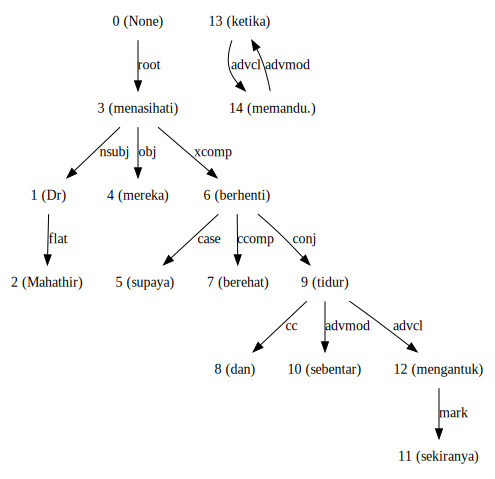

In [7]:
d_object, tagging, indexing = model.predict(string)
d_object.to_graphvis()

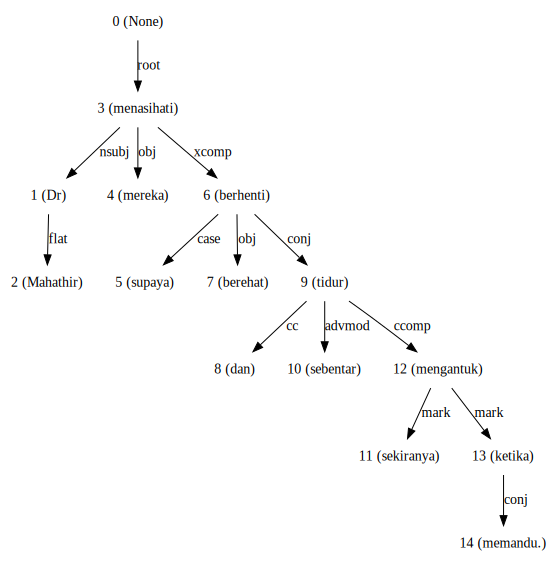

In [8]:
d_object, tagging, indexing = quantized_model.predict(string)
d_object.to_graphvis()

### Voting stack model

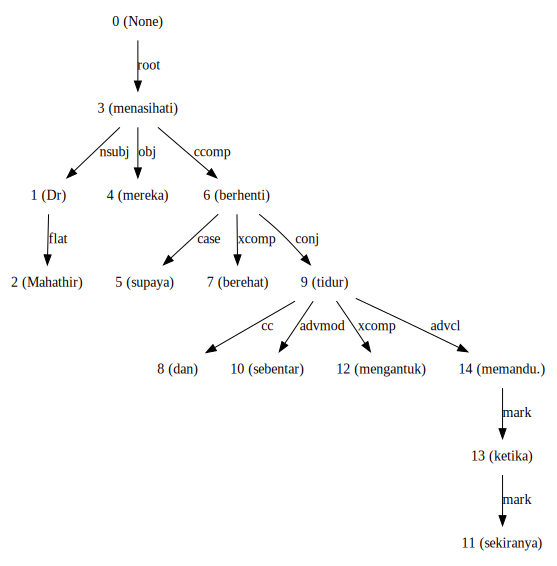

In [27]:
alxlnet = malaya.dependency.transformer(model = 'alxlnet')
tagging, indexing = malaya.stack.voting_stack([model, alxlnet, model], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()

### Dependency graph object

To initiate a dependency graph from dependency models, you need to call `malaya.dependency.dependency_graph`.

In [10]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph

#### generate graphvis

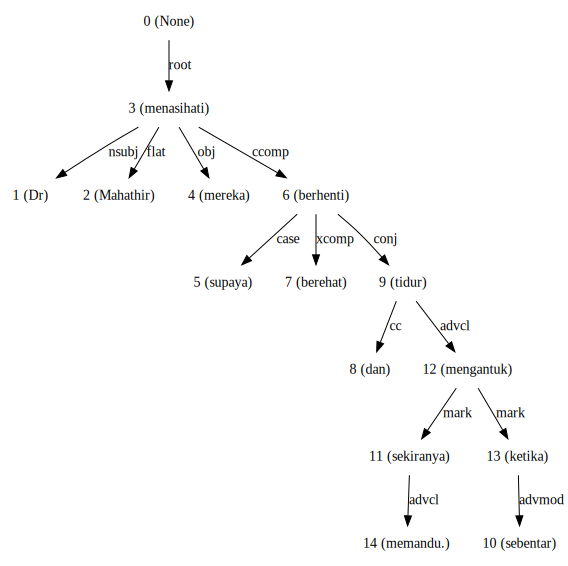

In [11]:
graph.to_graphvis()

#### Get nodes

In [12]:
graph.nodes

defaultdict(<function malaya.function.parse_dependency.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'root': [3]}),
              'rel': None},
             1: {'address': 1,
              'word': 'Dr',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 3,
              'deps': defaultdict(list, {}),
              'rel': 'nsubj'},
             3: {'address': 3,
              'word': 'menasihati',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 0,
              'deps': defaultdict(list,
                          {'nsubj': [1],
                           'flat': [2],
                     

#### Flat the graph

In [13]:
list(graph.triples())

[(('menasihati', '_'), 'nsubj', ('Dr', '_')),
 (('menasihati', '_'), 'flat', ('Mahathir', '_')),
 (('menasihati', '_'), 'obj', ('mereka', '_')),
 (('menasihati', '_'), 'ccomp', ('berhenti', '_')),
 (('berhenti', '_'), 'case', ('supaya', '_')),
 (('berhenti', '_'), 'xcomp', ('berehat', '_')),
 (('berhenti', '_'), 'conj', ('tidur', '_')),
 (('tidur', '_'), 'cc', ('dan', '_')),
 (('tidur', '_'), 'advcl', ('mengantuk', '_')),
 (('mengantuk', '_'), 'mark', ('sekiranya', '_')),
 (('sekiranya', '_'), 'advcl', ('memandu.', '_')),
 (('mengantuk', '_'), 'mark', ('ketika', '_')),
 (('ketika', '_'), 'advmod', ('sebentar', '_'))]

#### Check the graph contains cycles

In [14]:
graph.contains_cycle()

False

#### Generate networkx

Make sure you already installed networkx, 

```bash
pip install networkx
```

In [15]:
digraph = graph.to_networkx()
digraph

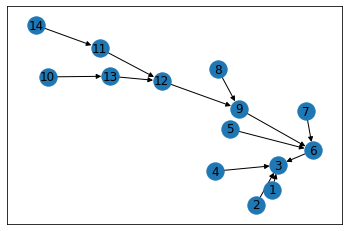

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_networkx(digraph)
plt.show()

In [17]:
digraph.edges()

OutMultiEdgeDataView([(1, 3), (2, 3), (4, 3), (5, 6), (6, 3), (7, 6), (8, 9), (9, 6), (10, 13), (11, 12), (12, 9), (13, 12), (14, 11)])

In [18]:
digraph.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [19]:
labels = {i:graph.get_by_address(i)['word'] for i in digraph.nodes()}
labels

{1: 'Dr',
 2: 'Mahathir',
 3: 'menasihati',
 4: 'mereka',
 5: 'supaya',
 6: 'berhenti',
 7: 'berehat',
 8: 'dan',
 9: 'tidur',
 10: 'sebentar',
 11: 'sekiranya',
 12: 'mengantuk',
 13: 'ketika',
 14: 'memandu.'}

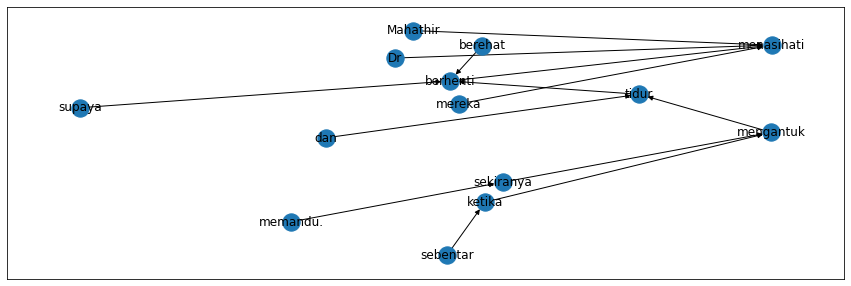

In [20]:
plt.figure(figsize=(15,5))
nx.draw_networkx(digraph,labels=labels)
plt.show()

### Vectorize

Let say you want to visualize word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, string: str):
    """
    vectorize a string.

    Parameters
    ----------
    string: List[str]

    Returns
    -------
    result: np.array
    """
```

In [21]:
r = quantized_model.vectorize(string)

In [22]:
x = [i[0] for i in r]
y = [i[1] for i in r]

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(y)
tsne.shape

(14, 2)

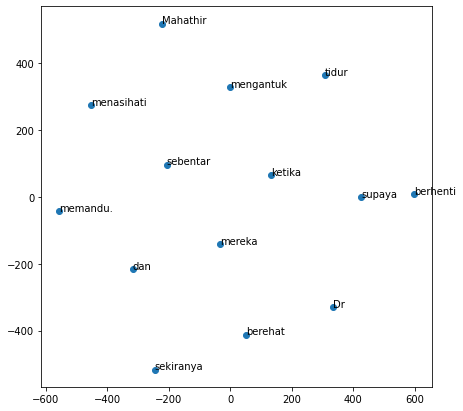

In [24]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )